# EDA Latam Challenge!

![Alt text](../docs/png-transparent-orlando-international-airport-latam-airlines-group-latam-chile-latam-brasil-logo-snapchat-purple-blue-violet.png)

- Author: Alan Matys
- Linkedin: https://www.linkedin.com/in/alanmatys/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy.distance import distance as geodesic_distance
import numpy as np
import os
import sys

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from make_data.input_data import read_df, synthetic_features, geo_data

In [4]:
df = read_df()
df.head()

c:\Lulu\Chal\latam_challenge\make_data\input_data.py:25: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


There is/are NaN in these Rows
 Fecha-I      False
Vlo-I        False
Ori-I        False
Des-I        False
Emp-I        False
Fecha-O      False
Vlo-O         True
Ori-O        False
Des-O        False
Emp-O        False
DIA          False
MES          False
AÑO          False
DIANOM       False
TIPOVUELO    False
OPERA        False
SIGLAORI     False
SIGLADES     False
dtype: bool


Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO              OPERA  \
0  KMIA   AAL    1    1  2017    Domingo         I  American Airlines   
1  KMIA   AAL    2    1  2017      Lunes         I  American Airlines   
2  KMIA   AAL    3    1  2017     Martes         I  American Airlines   
3  KMIA   AAL    4    1  2017  Miercoles         I  American Airlines   
4  KMIA   AAL    5    1  2017     Jueves         I  American Airlines   

   SIGLAORI SIGLADES  
0  Santiago    Miami  
1  Santiago    Miami  
2  Santiago    Miami  
3  Santiago    Miami  
4  Santiago    Miami

In [5]:
df = synthetic_features(df)
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...   AÑO     DIANOM  TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL  ...  2017    Domingo          I  American Airlines  Santiago   
1  KMIA   AAL  ...  2017      Lunes          I  American Airlines  Santiago   
2  KMIA   AAL  ...  2017     Martes          I  American Airlines  Santiago   
3  KMIA   AAL  ...  2017  Miercoles          I  American Airlines  Santiago   
4  KMIA   AAL  ...  2017     Jueves          I  American Airlines  Santiago   

  SIGLADES high_season min_diff  delay_15  period_day  
0    Miami           1      3.0         0       night  
1    Miami           1      9.0         0       night  
2    Miami           1      9.0         0       night  
3    Miami           1      3.0         0       night  
4    Miami           1     -2.0         0       night  

[5 rows x 22 columns]

## EDA (Exploratory Data Analysis)

In this section we try to describe the categorical and the numerical variables

### Categorical Features

In [6]:
def programed_vs_operated(df:pd.DataFrame):
    """

    Plot the comparision of the Programed features vs the Operated features

    Parameters
    --------------------

    - df: pandas.DataFrame
        Pandas DataFrame containing the this columns:
        - Origin Variables (Ori-I/Ori-O)
        - Destination Variables (Des-I/Des-O)
    
    """
    fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(20,12))

    fig.suptitle('Programmed vs Operation')

    sns.countplot(x=df["Ori-I"],
                order = df['Ori-I'].value_counts().index,
                ax=axes[0,0],
                color='red',
                alpha=0.7)

    sns.countplot(x=df["Ori-O"],
                order = df['Ori-O'].value_counts().index,
                ax=axes[0,1],
                color='blue',
                alpha=0.7)

    sns.countplot(x=df["Des-I"],
                order = df['Des-I'].value_counts().index,
                ax=axes[1,0],
                color='red',
                alpha=0.7)
    axes[1,0].tick_params(axis='x', rotation=90)

    sns.countplot(x=df["Des-O"],
                order = df['Des-O'].value_counts().index,
                ax=axes[1,1],
                color='blue',
                alpha=0.7)
    axes[1,1].tick_params(axis='x', rotation=90)

    dis_des = round((len(df[df['Des-I'] != df['Des-O']])/len(df)) * 100,2)

    axes[1,1].text(.4, .70,
                    f'{dis_des}% of the flights that ended on a different destination',
                    ha='left',
                    va='top',
                    color='blue',
                    transform=axes[1,1].transAxes)

    sns.countplot(x=df["Emp-I"],
                order = df['Emp-I'].value_counts().index,
                ax=axes[2,0],
                color='red',
                alpha=0.7)
    axes[2,0].tick_params(axis='x', rotation=90)

    sns.countplot(x=df["Emp-O"],
                order = df['Emp-O'].value_counts().index,
                ax=axes[2,1],
                color='blue',
                alpha=0.7)
    axes[2,1].tick_params(axis='x', rotation=90)

    dis_emp = round((len(df[df['Emp-I'] != df['Emp-O']])/len(df)) * 100,2)

    axes[2,1].text(.4, .70,
                    f'{dis_emp}% of the flights that have a diifferent Airline Code',
                    ha='left',
                    va='top',
                    color='blue',
                    transform=axes[2,1].transAxes)

    plt.show()

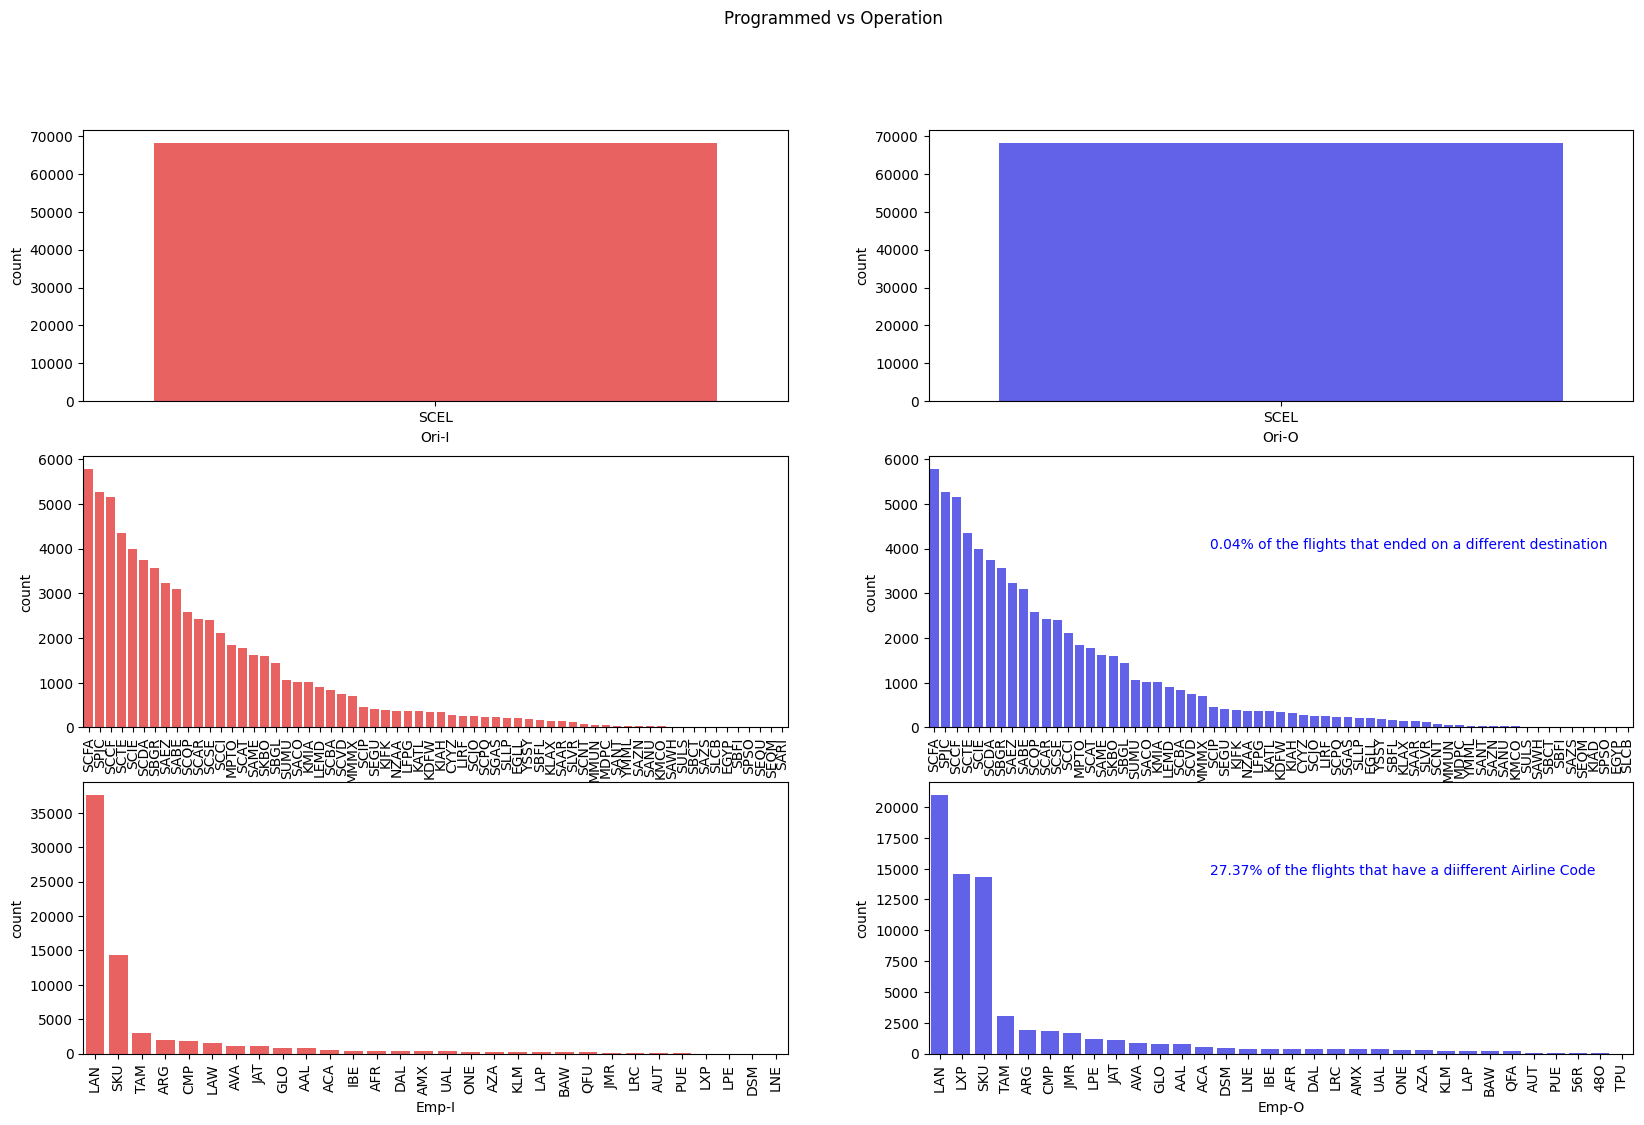

In [7]:
programed_vs_operated(df)

From this chart we can take the following insights
- More than 1/4 flights had a different airline code from the one that was programed.
- There are some flights, not usually, that ended on a different destination, based on the destination code

In [8]:
def other_categorical(df):
    """

    Plot other categorical Variables of the LATAM Dataframe

    Parameters
    --------------------
    df: pandas.Dataframe
        Latam Dataframe containing the 'TIPOVUELO', 'DIANOM', 'SIGLADES', 'OPERA' columns

    Returns
    -------------------
    None
    
    """
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,6))

    sns.histplot(x=df["TIPOVUELO"],
                    multiple="dodge", 
                    stat = 'percent',
                    shrink = 0.8,
                    common_norm=False,
                    ax = axes[0,0])

    sns.histplot(x=df["DIANOM"],
                    multiple="dodge", 
                    stat = 'percent',
                    shrink = 0.8,
                    ax = axes[0,1],
                    discrete=True,
                    hue = df['TIPOVUELO'])

    axes[0,1].get_legend().remove()

    sns.countplot(x=df['SIGLADES'],
                ax = axes[1,0],
                order = df['SIGLADES'].value_counts().index,
                hue= df['TIPOVUELO']
                )

    axes[1,0].tick_params(axis='x', rotation=90)
    axes[1,0].set(xlabel=None)

    sns.histplot(x=df["OPERA"],
                    multiple="dodge", 
                    stat = 'percent',
                    shrink = 0.8,
                    ax = axes[1,1],
                    discrete=True,
                    hue = df['TIPOVUELO'])

    axes[1,1].tick_params(axis='x', rotation=90)
    axes[1,1].set(xlabel=None)


    plt.show()

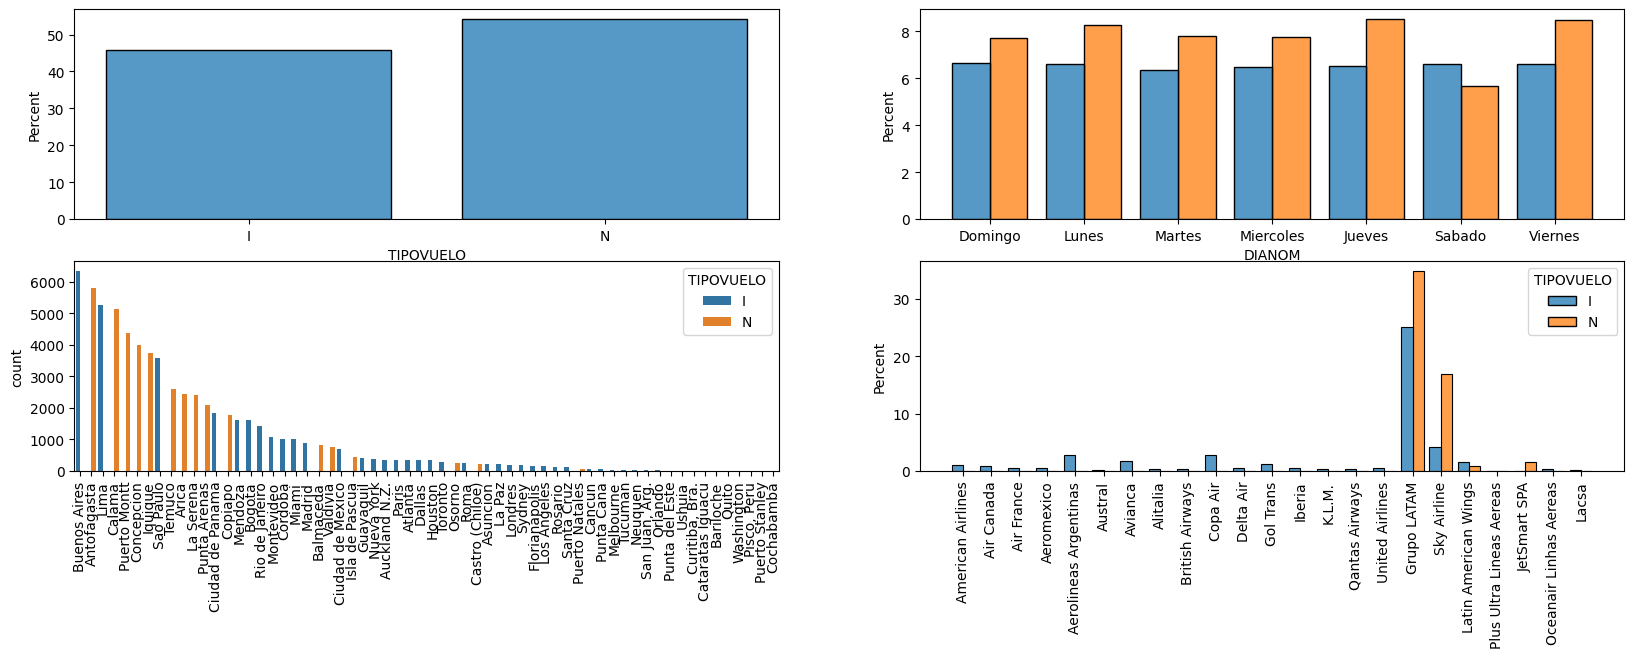

In [9]:
other_categorical(df)

From this chart we can take the following insights:
- FROM Chart 1:

There are more National Flights (within Chile) than International Flights (from SCL to another country), but more or less is equivalent.

- From Chart 2:

International flights are uniform in terms of the day of the flight, but for National flights it's not the same, there are significantly fewer flights on Saturdays and the proportion changes on this day (More Int flights)

- From Chart 3:

The top destination is Buenos Aires, the second place is for Antofagasta. On the top 10 flights most of them are national flights.

- From Chart 4:

Latam clearly dominates both National and International Flights in SCL. On second place we have Sky Airline with a significant market on National and some on International. With Latam & Sky we have ~ 80% of the flights

The others seem far from Top 2 players


### Consistency of results in time

We examine if the dominance from both airlines and destinations has persisted in time for the full year or from certain perioid and on they gained full dominance.

In [10]:
def time_s_airlines(df, var):
    """
    
    """
    fig,ax = plt.subplots(nrows = 4,figsize=(20,28))

    plot = df.groupby([df['Fecha-I'].dt.date,df[var]]).agg(vuelos = ('Vlo-I','count'))

    sns.lineplot(plot,x='Fecha-I',y='vuelos',hue=var, ax= ax[0])

    ax[0].set_title('Flights per Day')
    ax[0].set(xlabel=None)

    sns.move_legend(
    ax[0], loc="center left",
    bbox_to_anchor=(1, .7), ncol=2, title=None
    )


    plot_2 = df[~df.OPERA.isin(['Grupo LATAM','Sky Airline'])].groupby([df['Fecha-I'].dt.date,df[var]]).agg(vuelos = ('Vlo-I','count'))

    sns.lineplot(plot_2,x='Fecha-I',y='vuelos',hue=var, ax= ax[1])


    sns.move_legend(
    ax[1], loc="center left",
    bbox_to_anchor=(1, .7), ncol=2, title=None
    )

    ax[1].set_title('Flights Excluding LATAM & Sky')
    ax[1].set(xlabel=None)


    df_nac = df[df['TIPOVUELO'] == 'N']

    plot_nac = df_nac.groupby([df_nac['Fecha-I'].dt.date,df[var]]).agg(vuelos = ('Vlo-I','count'))

    sns.lineplot(plot_nac,x='Fecha-I',y='vuelos',hue=var, ax=ax[2])

    sns.move_legend(
    ax[2], loc="center left",
    bbox_to_anchor=(1, .9), ncol=2, title=None, fancybox=True, shadow=True
    )


    ax[2].set_title('Nac Flights')
    ax[2].set(xlabel=None)


    df_int = df[df['TIPOVUELO'] == 'I']

    plot_int = df_int.groupby([df_int['Fecha-I'].dt.date,df[var]]).agg(vuelos = ('Vlo-I','count'))

    sns.lineplot(plot_int,x='Fecha-I',y='vuelos',hue=var)


    ax[3].set_title('Int Flights')
    ax[3].set(xlabel=None)

    sns.move_legend(
    ax[3], loc="center left",
    bbox_to_anchor=(1, .7), ncol=2, title=None
    )

    
    plt.show()

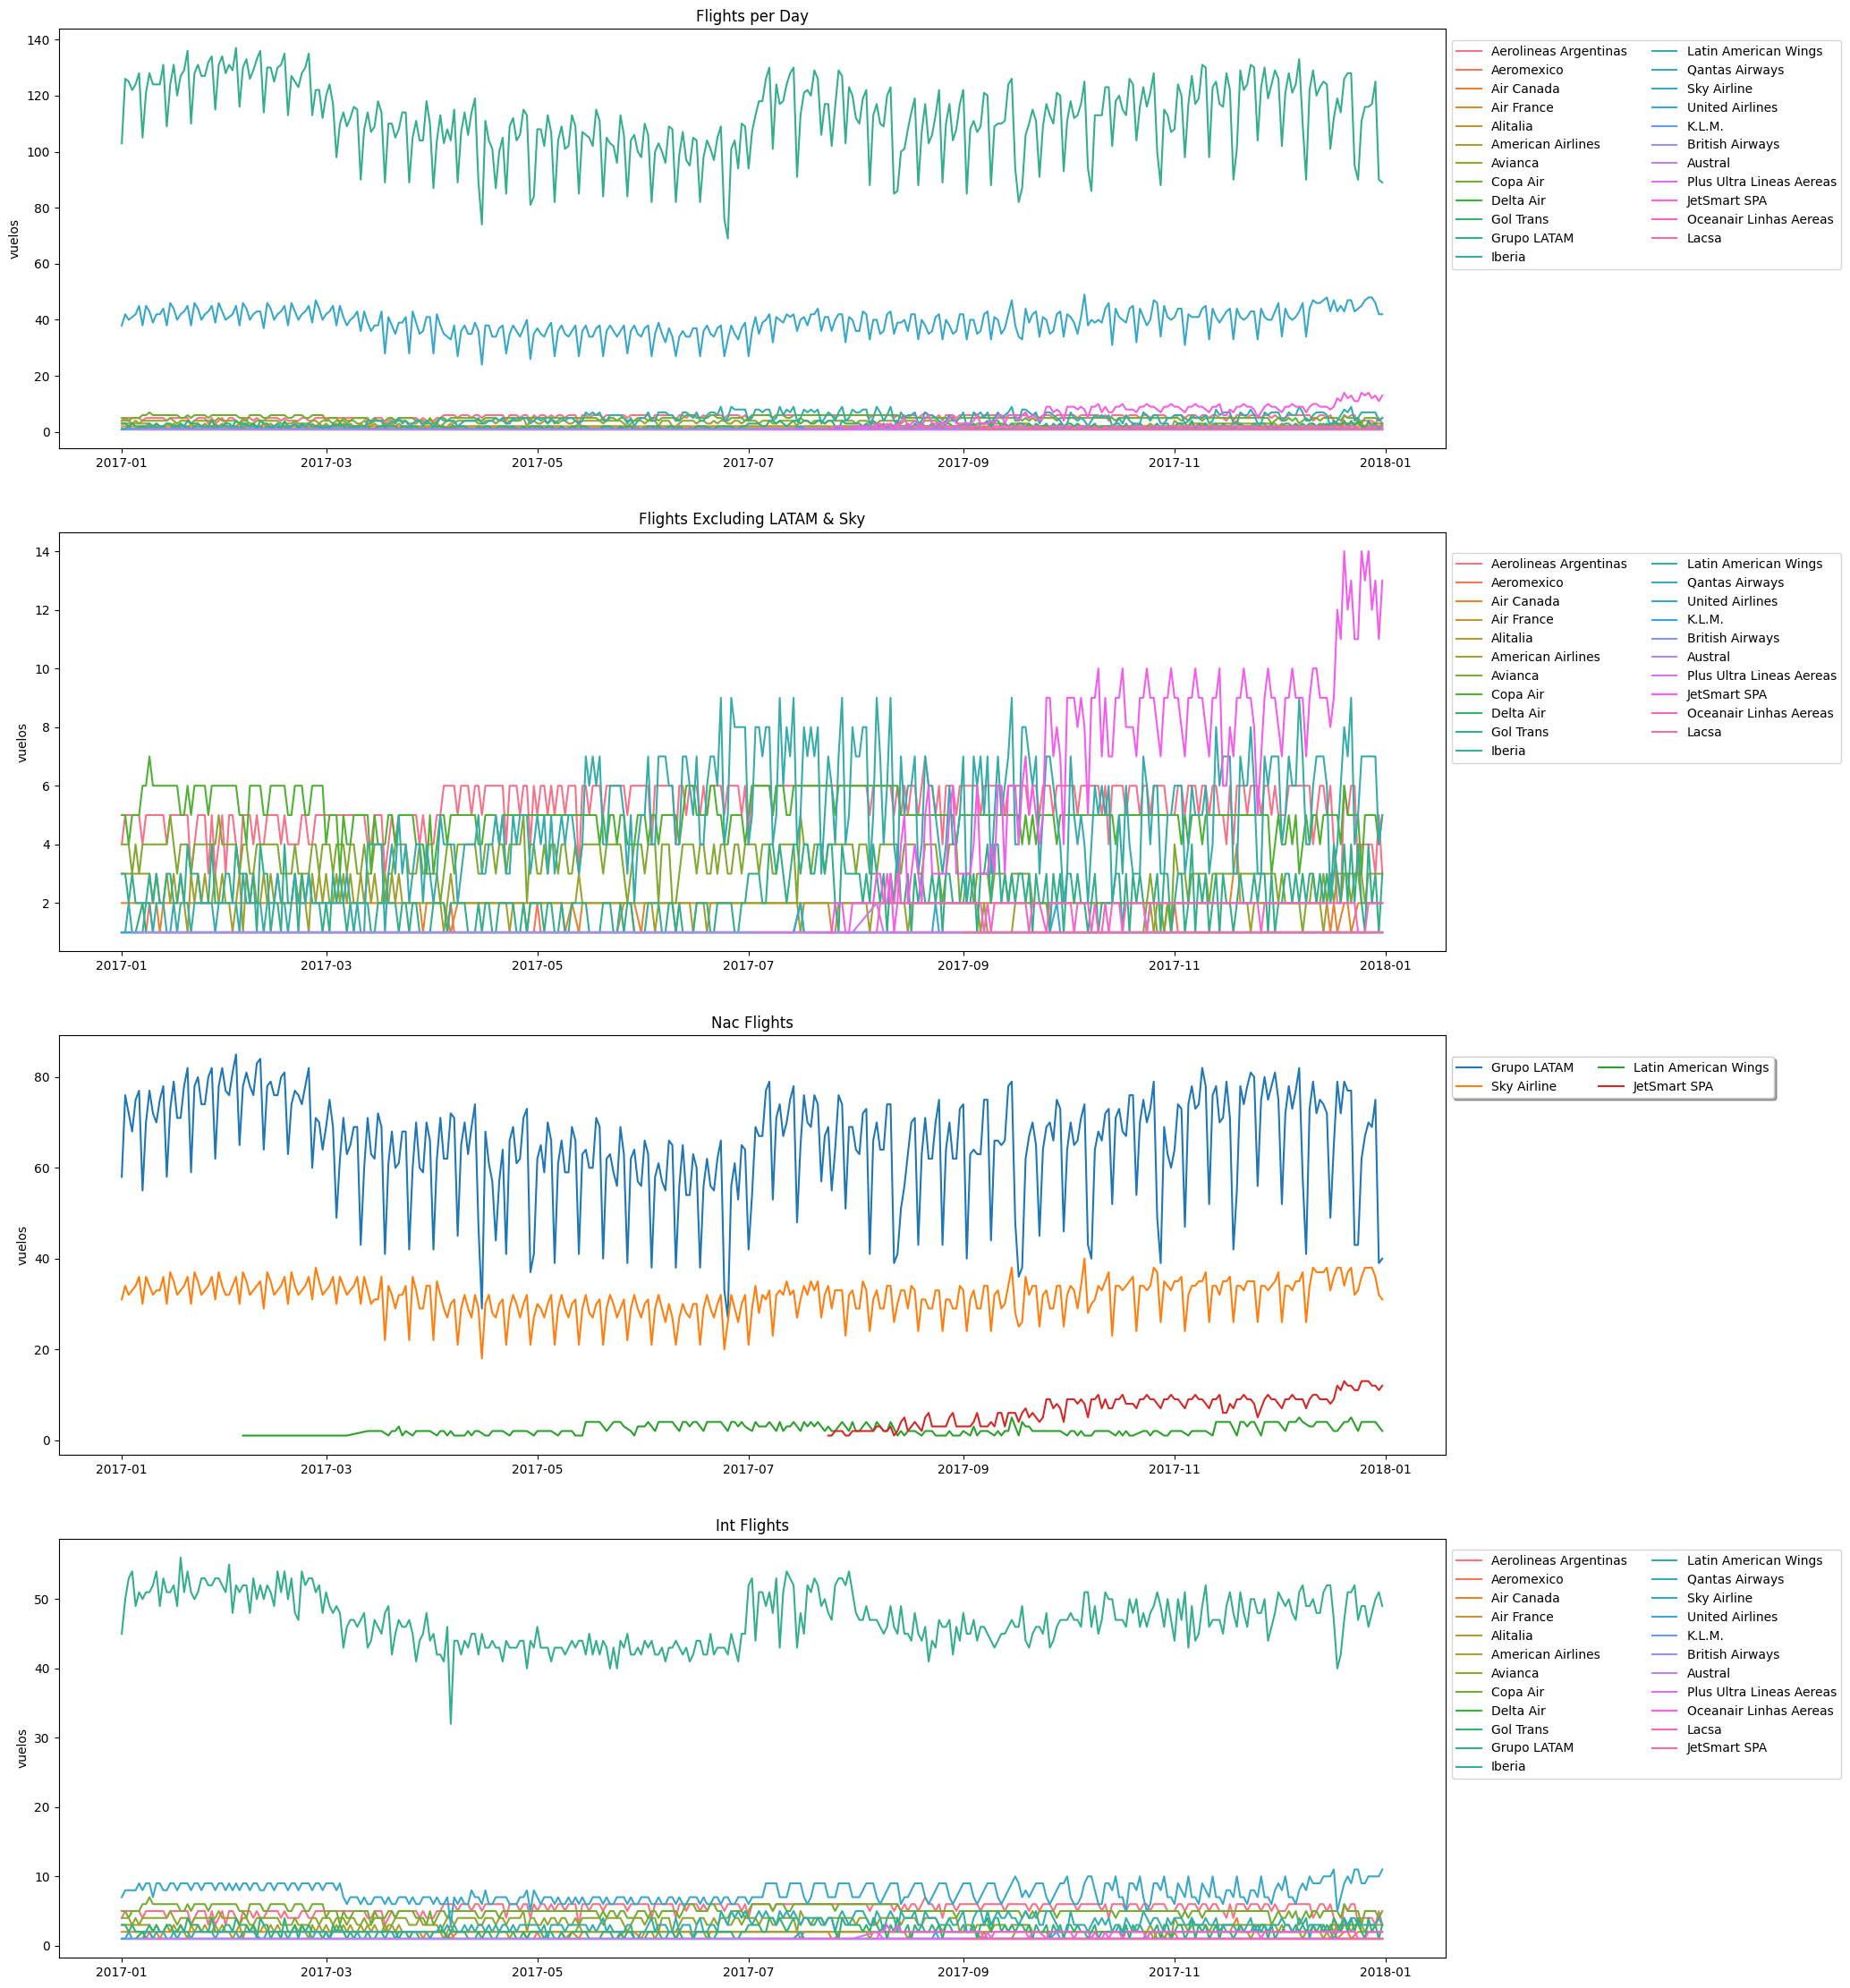

In [11]:
time_s_airlines(df,'OPERA')

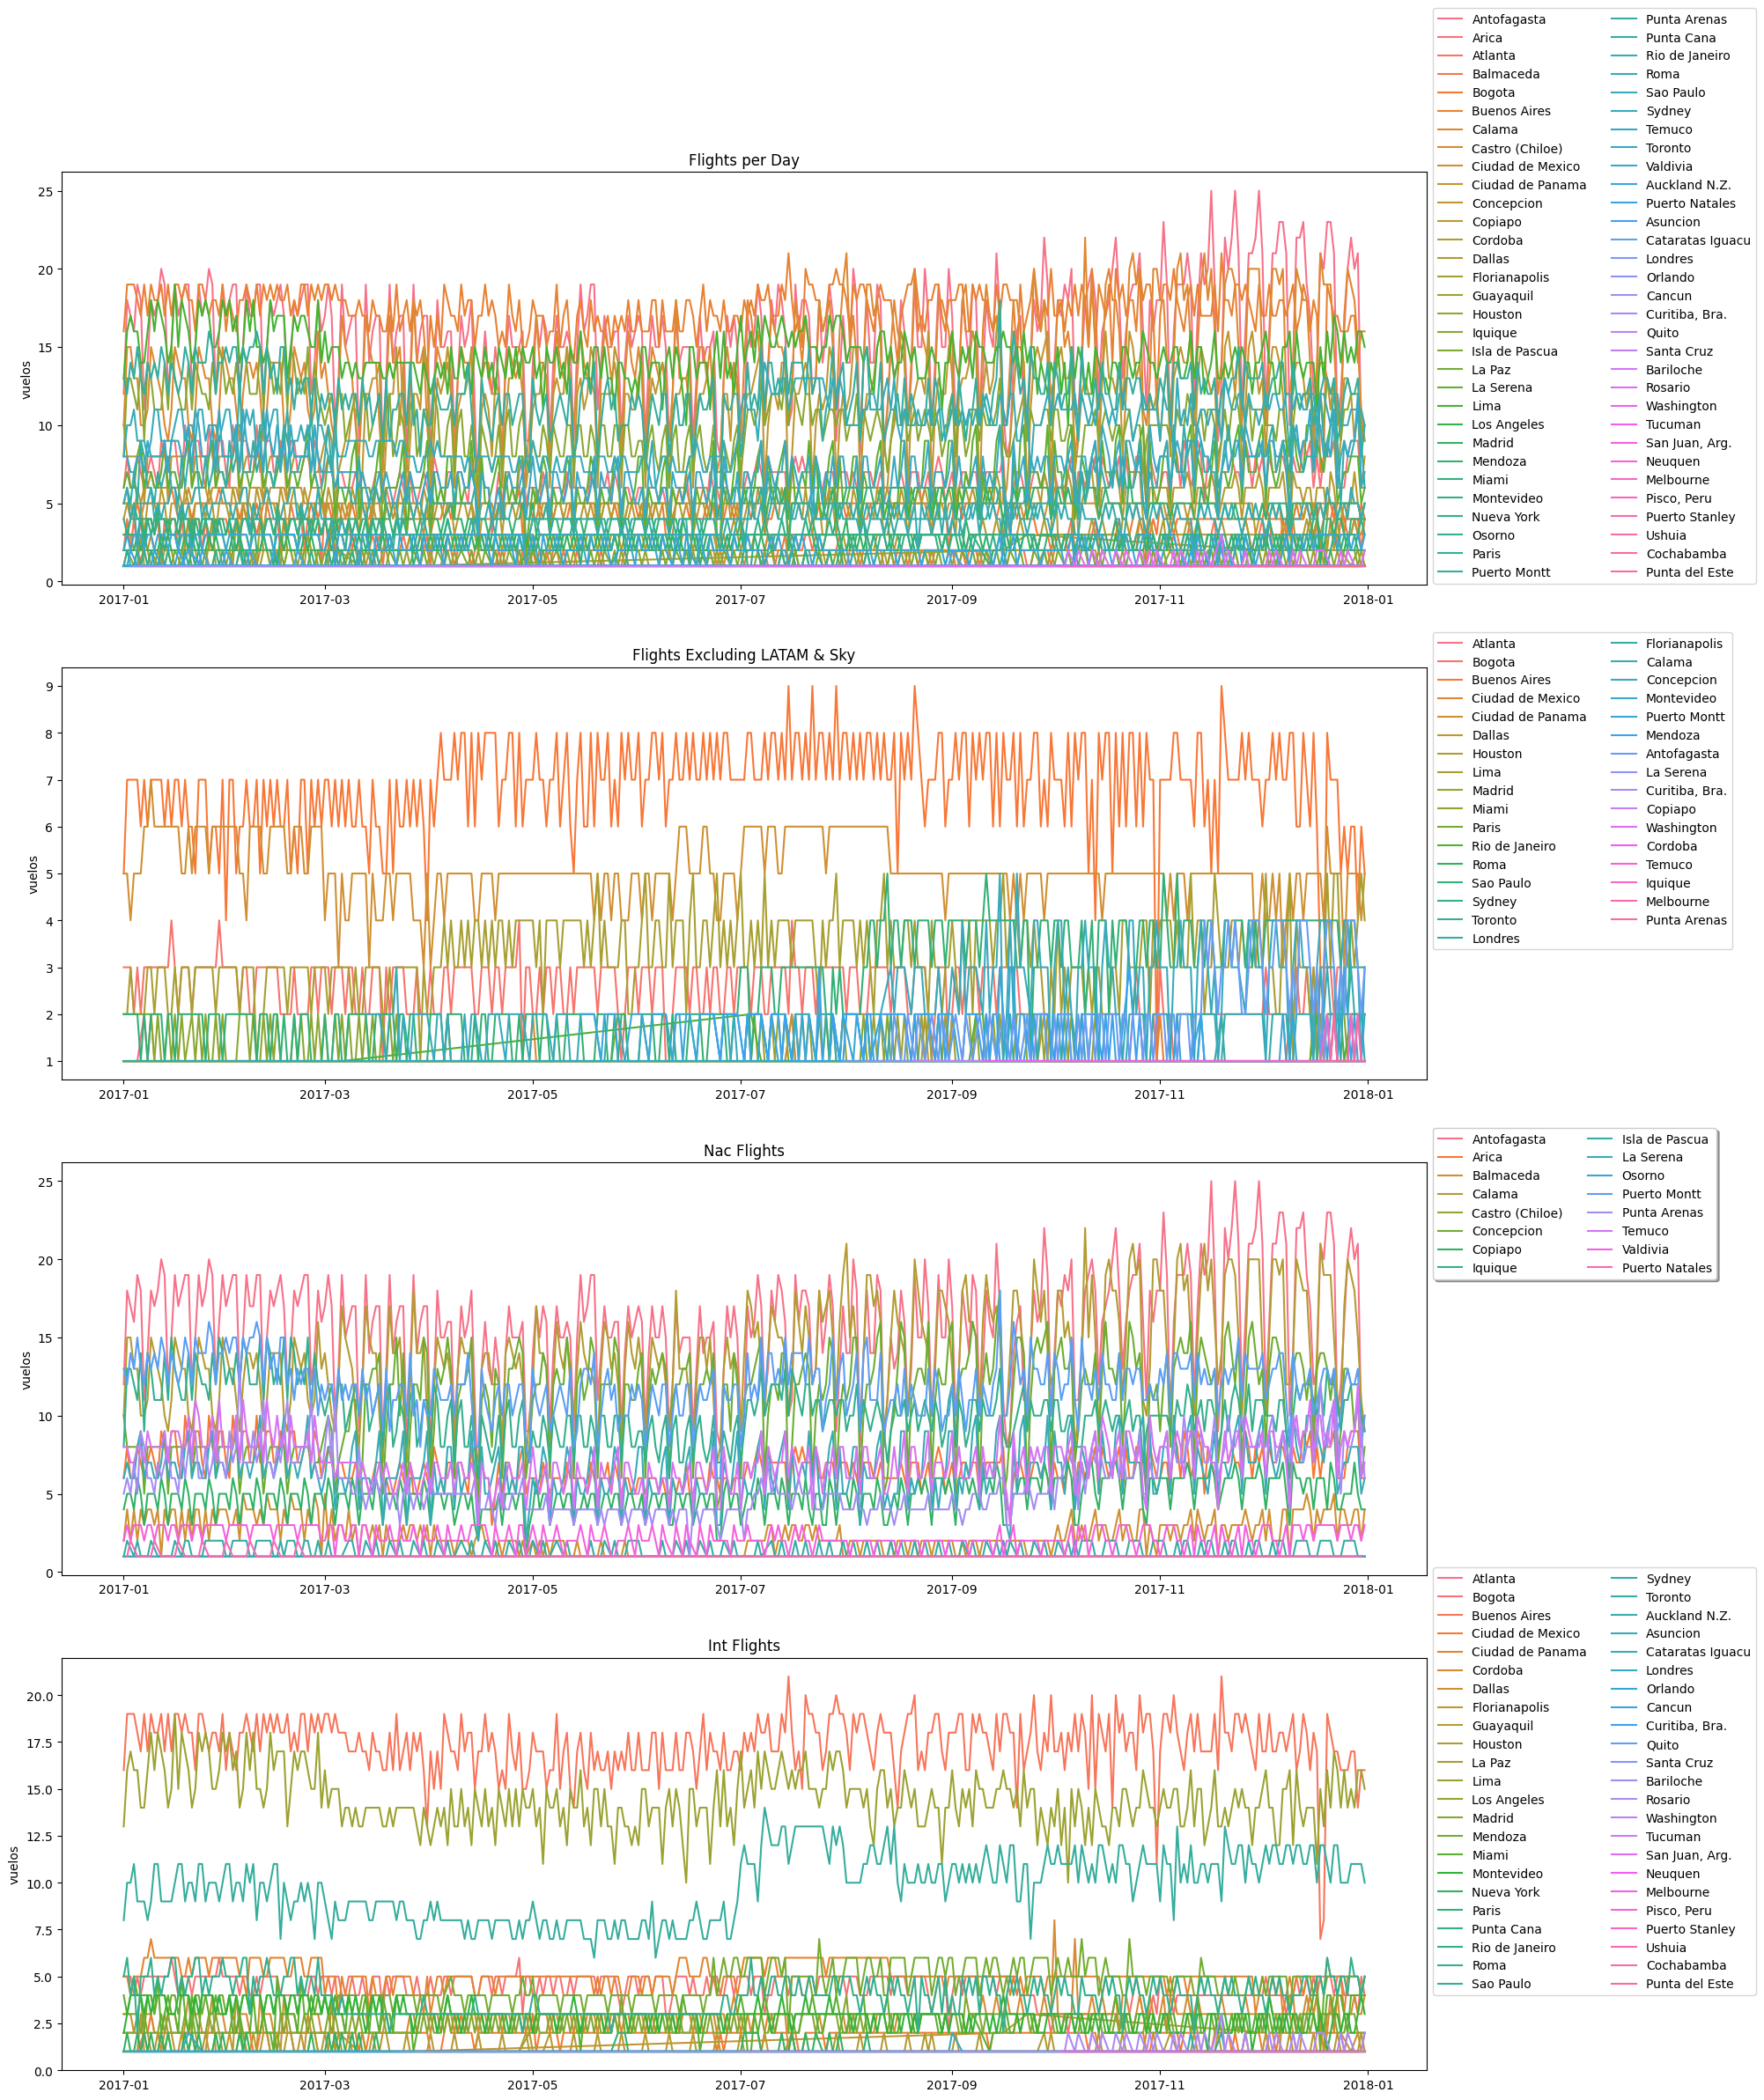

In [12]:
time_s_airlines(df, 'SIGLADES')

## Continuous Features

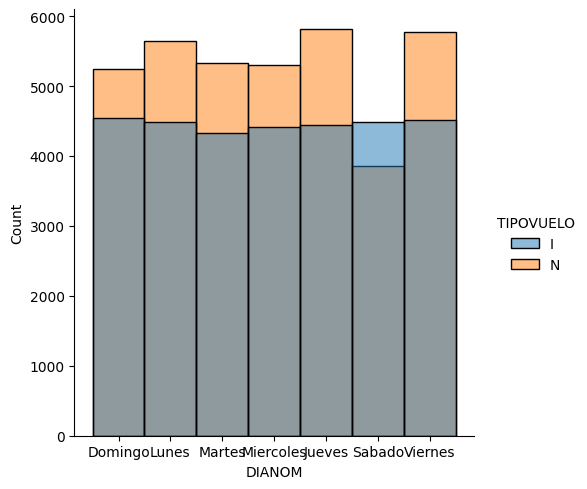

In [13]:
sns.displot(x=df['DIANOM'],bins=12,hue=df['TIPOVUELO'])

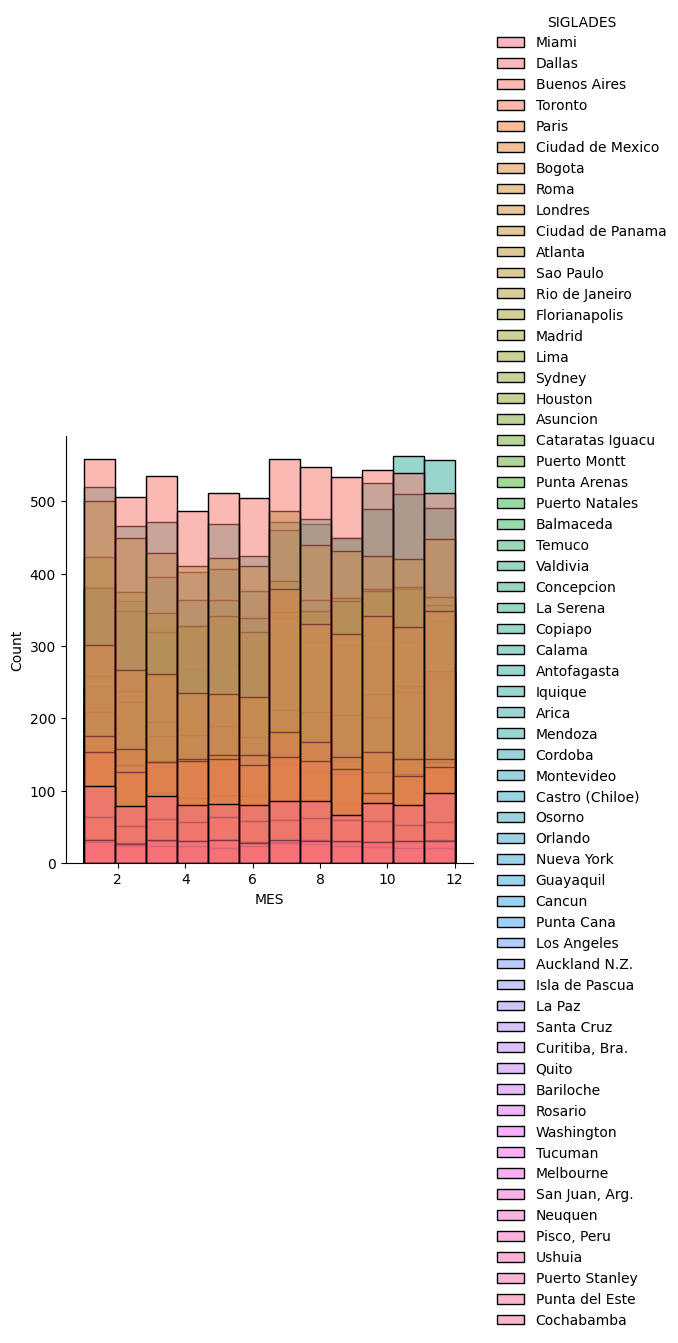

In [14]:
sns.displot(x=df['MES'], bins=12,hue=df['SIGLADES'])

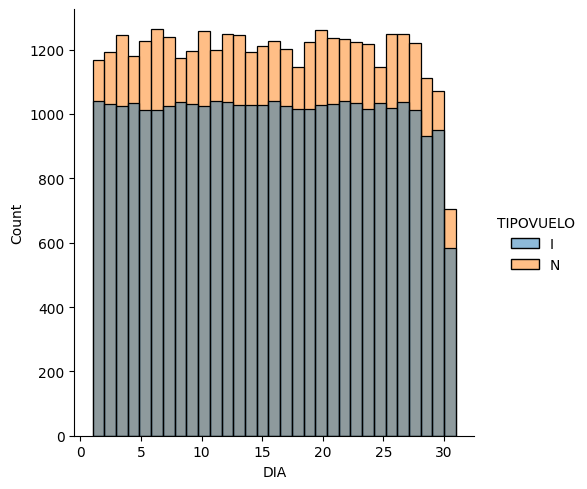

In [406]:
sns.displot(x=df['DIA'], bins=31,hue=df['TIPOVUELO'])

## Extra Features

We will add some features from the dataset and exogenous sources.


In [15]:
df_geo = geo_data(df)
df_geo.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...  SIGLAORI  SIGLADES  high_season min_diff delay_15  \
0  KMIA   AAL  ...  Santiago     Miami            1      3.0        0   
1  KMIA   AAL  ...  Santiago     Miami            1      9.0        0   
2  KMIA   AAL  ...  Santiago     Miami            1      9.0        0   
3  KMIA   AAL  ...  Santiago     Miami            1      3.0        0   
4  KMIA   AAL  ...  Santiago     Miami            1     -2.0        0   

  period_day   Dest      Orig     distance    country_des  
0      night  Miami  Santiago  1801.048899  United States  
1      night  Miami  Santiago  1801.048899  United States  
2      night  Miami  Santiago  1801.048899  United States  
3      night  Miami  Santiago  1801.048899  United States  
4      night  Miami  Santiago  1801.048899  United States  

[5 rows x 26 columns]